# Heart Disease Indicator with Logistic Regression (DS-160 Final Project)

### Made: 12/5/2025---12/7/2025
### In this Notebook, this will use the "Indicators of Heart Disease (2022 UPDATE)" from Kaggle.
### This dataset has over 246,000 rows, but for the same for simplicity, I will mostly return the head of the dataset and get random samples for viewing.
### Originally, 'GeneralHealth' would be the target varible in the dataset, but since it has multiple fields like good, fair, poor, etc, I decided to have 'HadHeartAttack' due to it being more specific and how it a big factor into a person having heart disease or not. This column is also binary, having 'Yes' and 'No' being like True or False. 
### 'HadHeartAttack' will be the target column, where it will be transformed into a dummy column, where drop_first= True is applied to have HadHeartAttack_True being either false or true.
### Logistic Regression model will be used to do predictions of this columns with the others like BMI, Age, and more.


## Step 1. Importing necessary libraries:

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Step 2. Loading the Dataset:

In [5]:
df = pd.read_csv("yeke_ferdinand_Dataset_Clean.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# IMPORTANT: Columns for PhysicalHealthDays and MentalHealthDays
- ### PhysicalHealthDays: In reference to the survey, "How many days (in the past 30) do you consider your physical health not good?"
- ### MentalHealthDays: In reference to the survey, "How many days (in the past 30) do you consider your mental health not good?"

In [613]:
#Checking summary of dataset.
df.info
#There are 25 rows

<bound method DataFrame.info of                  State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months 

In [614]:
#Checks the amount of null fields in the dataset
df.isnull().sum()
# Unsuprisingly, with using the no nans version of the dataset, there are no null values.

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

This dataset has about 246,022 rows with 40 columns.
In this Final Project, perhaps 1000 rows will be used with < 40 columns.

In [616]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [617]:
df.head(1000)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Alabama,Male,Very good,0.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,8.0,1 to 5,No,...,1.83,136.08,40.69,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
996,Alabama,Female,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,54.43,19.97,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
997,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.75,88.45,28.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
998,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,"6 or more, but not all",No,...,1.57,73.48,29.63,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


Dummy columns that would be used for this dataset are "GeneralHealth", "Sex", possibly "HadHeartAttack"
Columns that can be kept are Sex, RaceEthnicityCategory,GeneralHealth, PhysicalActivities, HadHeartAttack, HadStroke, HadCOPD, DificultyWalking, SmokerStatus, AgeCategory, BMI, SleepHours,ChestScan, and AlcoholDrinkers. Everything else would be dropped.

## Step 3. Exploratory Data Analysis

In [620]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


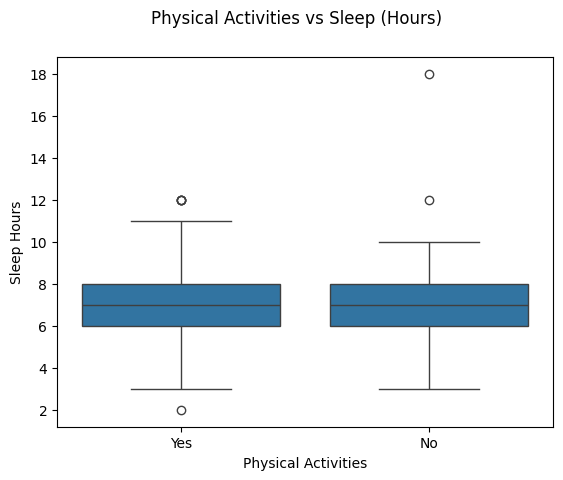

In [11]:
sns.boxplot(data= df.head(500), x="PhysicalActivities",y="SleepHours")
plt.xlabel("Physical Activities")
plt.ylabel("Sleep Hours")
plt.suptitle("Physical Activities vs Sleep (Hours)")
plt.show()

In this first EDA Visualization, this graph comparing Physical Activities with the Sleep in hours. What is interesting here
is that with the all of the respondants that said no with physical activites, they seem to have 7 hours of sleep or lower, while with 
the respondants that said that they have done Physical Activities, they had at least more than 7 hours of sleep.

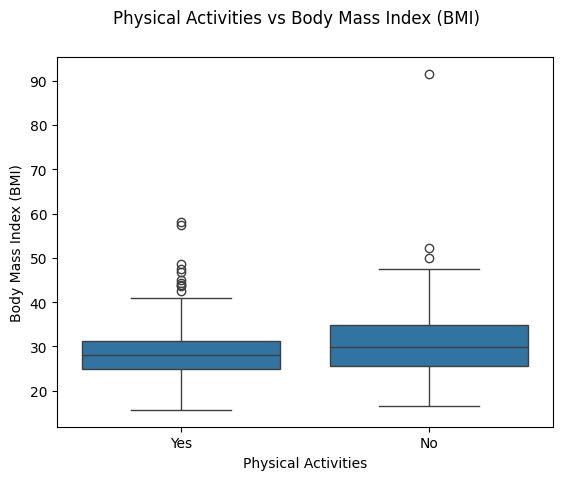

In [19]:
sns.boxplot(data= df.head(500), x="PhysicalActivities",y="BMI")
plt.xlabel("Physical Activities")
plt.ylabel("Body Mass Index (BMI)")
plt.suptitle("Physical Activities vs Body Mass Index (BMI)")
plt.show()

In this second EDA visualation of the boxplot, with the respondants that said yes to Physical Activities, they had an average BMI at high 20s. With the respondants that said no to physical activites, the BMI average was at low 30s. However there are some outliers with the  respondants that said no, where an outlier is at 90 BMI.

# Step 4. Preprocessing and Encoding Values

PhysicalActivites and GeneralHealth Column will be dropped since GeneralHealth is more of a summarization of both of them.

In [626]:
# Dropping every other columns that are not really as correlated to heart disease symtoms.
# Some columns, like ECigaretteUsage was dropped since the SmokeStatus column is already there to show if the person smokes. It just a 
# general status of smoking.
df= df.drop(['MentalHealthDays',"LastCheckupTime","RemovedTeeth","HadSkinCancer",
                 "HadAsthma","HadDepressiveDisorder","HadArthritis", "DeafOrHardOfHearing",
                 "BlindOrVisionDifficulty","DifficultyConcentrating", "DifficultyDressingBathing",
                 "DifficultyErrands","HeightInMeters", "WeightInKilograms", "FluVaxLast12", 
                 "PneumoVaxEver", "TetanusLast10Tdap","CovidPos","PhysicalHealthDays","ECigaretteUsage","State","RaceEthnicityCategory","ChestScan"
            ],axis=1)

In [627]:
# The new dataset
df.sample(5)

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,HighRiskLastYear
196809,Male,Very good,Yes,7.0,No,No,No,No,No,No,No,Never smoked,Age 30 to 34,22.43,Yes,No,No
33831,Female,Very good,Yes,6.0,No,No,No,No,No,No,No,Former smoker,Age 75 to 79,29.76,Yes,No,No
34416,Female,Fair,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,Age 55 to 59,25.79,No,No,No
189498,Female,Good,No,7.0,No,No,No,No,No,"Yes, but only during pregnancy (female)",Yes,Never smoked,Age 55 to 59,46.59,No,No,No
228411,Male,Good,No,9.0,No,No,No,No,No,No,No,Never smoked,Age 55 to 59,21.62,No,No,No


In [628]:
df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD',
       'HadKidneyDisease', 'HadDiabetes', 'DifficultyWalking', 'SmokerStatus',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'HighRiskLastYear'],
      dtype='object')

In [629]:
# Making Dummy columns
# Edit 12/6/2025: Since GeneralHealth (and potentially HadHeartAttack) will be predictors of y, dummies of them will not be needed.
# Edit 12/9/2025: HadHeartAttack Will be the predictor of y instead of GeneralHealth.
#df = pd.get_dummies(df, columns=["Sex","GeneralHealth","SmokerStatus", "AgeCategory"])
df = pd.get_dummies(df, columns=["Sex","SmokerStatus", "AgeCategory"])

In [630]:
# Gets the columns
df.columns

Index(['GeneralHealth', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease', 'HadDiabetes',
       'DifficultyWalking', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'HighRiskLastYear', 'Sex_Female', 'Sex_Male',
       'SmokerStatus_Current smoker - now smokes every day',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'AgeCategory_Age 18 to 24', 'AgeCategory_Age 25 to 29',
       'AgeCategory_Age 30 to 34', 'AgeCategory_Age 35 to 39',
       'AgeCategory_Age 40 to 44', 'AgeCategory_Age 45 to 49',
       'AgeCategory_Age 50 to 54', 'AgeCategory_Age 55 to 59',
       'AgeCategory_Age 60 to 64', 'AgeCategory_Age 65 to 69',
       'AgeCategory_Age 70 to 74', 'AgeCategory_Age 75 to 79',
       'AgeCategory_Age 80 or older'],
      dtype='object')

In [631]:
# Okay, lets try to add more dummies.
df = pd.get_dummies(df, columns= ["PhysicalActivities","HadAngina","HadStroke","HadCOPD",
                                 "DifficultyWalking","AlcoholDrinkers","HIVTesting","HighRiskLastYear","GeneralHealth"])

In [632]:
df.columns

Index(['SleepHours', 'HadHeartAttack', 'HadKidneyDisease', 'HadDiabetes',
       'BMI', 'Sex_Female', 'Sex_Male',
       'SmokerStatus_Current smoker - now smokes every day',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'AgeCategory_Age 18 to 24', 'AgeCategory_Age 25 to 29',
       'AgeCategory_Age 30 to 34', 'AgeCategory_Age 35 to 39',
       'AgeCategory_Age 40 to 44', 'AgeCategory_Age 45 to 49',
       'AgeCategory_Age 50 to 54', 'AgeCategory_Age 55 to 59',
       'AgeCategory_Age 60 to 64', 'AgeCategory_Age 65 to 69',
       'AgeCategory_Age 70 to 74', 'AgeCategory_Age 75 to 79',
       'AgeCategory_Age 80 or older', 'PhysicalActivities_No',
       'PhysicalActivities_Yes', 'HadAngina_No', 'HadAngina_Yes',
       'HadStroke_No', 'HadStroke_Yes', 'HadCOPD_No', 'HadCOPD_Yes',
       'DifficultyWalking_No', 'DifficultyWalking_Yes', 'AlcoholDrinkers_No',
       'AlcoholDrinkers_Yes', 'HIVTesting_No

In [633]:
# After adding more dummy columns to the categorical columns that are kept, there are a total of 46 columns.
df.head()

,SleepHours,HadHeartAttack,HadKidneyDisease,HadDiabetes,BMI,Sex_Female,Sex_Male,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,...,AlcoholDrinkers_Yes,HIVTesting_No,HIVTesting_Yes,HighRiskLastYear_No,HighRiskLastYear_Yes,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good
0,9.0,No,No,No,27.99,True,False,False,False,True,...,False,True,False,True,False,False,False,False,False,True
1,6.0,No,No,Yes,30.13,False,True,False,False,True,...,False,True,False,True,False,False,False,False,False,True
2,8.0,No,No,No,31.66,False,True,False,False,True,...,True,True,False,True,False,False,False,False,False,True
3,9.0,No,No,No,31.32,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4,5.0,No,No,No,33.07,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [634]:
#for i in df["HadHeartAttack"]:
#    if (i=="Yes"):
#        df["HadHeartAttack"] = 0
#    elif(i=="No"):
#        df["HadHeartAttack"] = 1

In [635]:
df = pd.get_dummies(df, columns= ["HadDiabetes","HadHeartAttack"],drop_first= True)

In [636]:
df = pd.get_dummies(df, columns= ["HadKidneyDisease"],drop_first= True)

In [637]:
df.head(1000)

,SleepHours,BMI,Sex_Female,Sex_Male,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,...,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",HadHeartAttack_Yes,HadKidneyDisease_Yes
0,9.0,27.99,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,6.0,30.13,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,8.0,31.66,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,9.0,31.32,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,5.0,33.07,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.0,40.69,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
996,8.0,19.97,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
997,7.0,28.80,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
998,6.0,29.63,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [638]:
df.head()

,SleepHours,BMI,Sex_Female,Sex_Male,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,...,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",HadHeartAttack_Yes,HadKidneyDisease_Yes
0,9.0,27.99,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,6.0,30.13,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,8.0,31.66,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,9.0,31.32,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,5.0,33.07,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [679]:
df.head(10)

,SleepHours,BMI,Sex_Female,Sex_Male,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,...,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",HadHeartAttack_Yes,HadKidneyDisease_Yes
0,9.0,27.99,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,6.0,30.13,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,8.0,31.66,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,9.0,31.32,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,5.0,33.07,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
5,7.0,34.96,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
6,8.0,33.30,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
7,8.0,24.37,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
8,6.0,26.94,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9,7.0,22.60,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Step 5: Split Data

In [645]:
# X will drop the columns HadHeartAttack and GeneralHealth, while y will only include those two.
X = df.drop("HadHeartAttack_Yes",axis=1)
y = df["HadHeartAttack_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = .20,
                                                    random_state = 42)

In [673]:
df["HadHeartAttack_Yes"].unique

<bound method Series.unique of 0         False
1         False
2         False
3         False
4         False
          ...  
246017    False
246018    False
246019    False
246020    False
246021     True
Name: HadHeartAttack_Yes, Length: 246022, dtype: bool>

# Step 6: Train Logistic Regression Model

In [647]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train.values, y_train.values)
y_pred= model.predict(X_test.values)

# Step 7: Evaluating Model

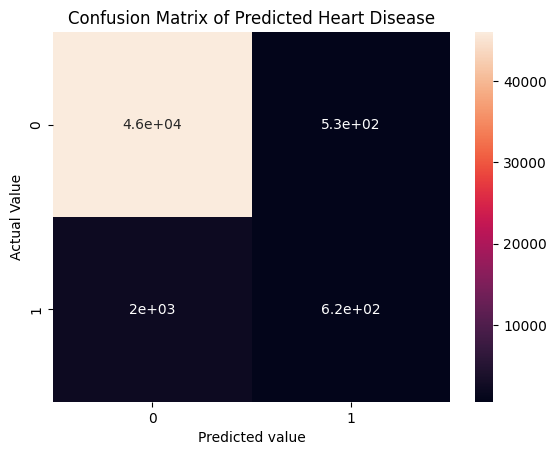

In [721]:
# Confusion matrix of the predicted heart disease
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)
plt.title("Confusion Matrix of Predicted Heart Disease")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.show()

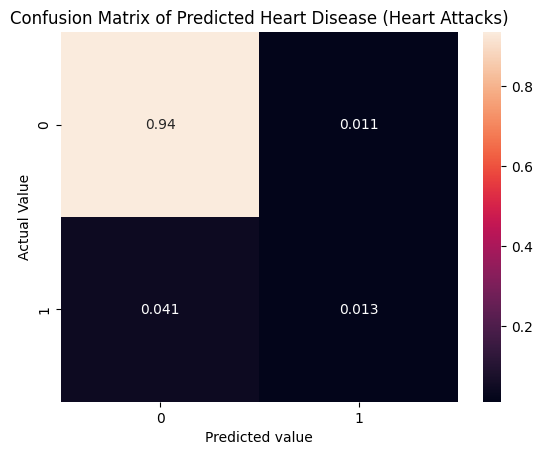

In [730]:
# Normalized Version of the Confusion Matrix
cm= confusion_matrix(y_test, y_pred,normalize="all")
sns.heatmap(cm, annot= True)
plt.title("Confusion Matrix of Predicted Heart Disease (Heart Attacks)")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.show()

Here, this shows the model's prediction in a normalized format. In the true negatives, it predicted that 94% haven't had heart disease, and it was right. In the Fasle Positives, it predicted that 0.01% had heart disease, and it is actually wrong. In the False Negatives, it predicted that 0.04% haven't had heart disease, and it is actually wrong. In the True Positive, it predicted that 0.013% had disease, and it is actaully right.

In [809]:
# The accuracy rating of the model:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97     46573
        True       0.54      0.23      0.33      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



# Step 8: Prediction

In [811]:
# Checking the new columns for reference of the model.predict field
X.columns

Index(['SleepHours', 'BMI', 'Sex_Female', 'Sex_Male',
       'SmokerStatus_Current smoker - now smokes every day',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'AgeCategory_Age 18 to 24', 'AgeCategory_Age 25 to 29',
       'AgeCategory_Age 30 to 34', 'AgeCategory_Age 35 to 39',
       'AgeCategory_Age 40 to 44', 'AgeCategory_Age 45 to 49',
       'AgeCategory_Age 50 to 54', 'AgeCategory_Age 55 to 59',
       'AgeCategory_Age 60 to 64', 'AgeCategory_Age 65 to 69',
       'AgeCategory_Age 70 to 74', 'AgeCategory_Age 75 to 79',
       'AgeCategory_Age 80 or older', 'PhysicalActivities_No',
       'PhysicalActivities_Yes', 'HadAngina_No', 'HadAngina_Yes',
       'HadStroke_No', 'HadStroke_Yes', 'HadCOPD_No', 'HadCOPD_Yes',
       'DifficultyWalking_No', 'DifficultyWalking_Yes', 'AlcoholDrinkers_No',
       'AlcoholDrinkers_Yes', 'HIVTesting_No', 'HIVTesting_Yes',
       'HighRiskLastYear_No', 'HighRisk

In [677]:
# Getting a random sample of ten rows in reference of the dataset by X.
X.sample(10)

,SleepHours,BMI,Sex_Female,Sex_Male,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,...,HighRiskLastYear_Yes,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",HadKidneyDisease_Yes
1817,7.0,36.61,True,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
44108,5.0,39.53,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
114727,6.0,36.94,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
140224,7.0,19.84,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
230757,8.0,34.46,False,True,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
206684,8.0,39.06,True,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
214972,7.0,27.89,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
21509,6.0,28.43,False,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
101871,6.0,30.41,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
163786,6.0,31.00,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [737]:
# 1. Sleep Hours
# 2. BMI
# 3. Sex_Female
# 4. Sex_Male
# 5. SmokerStatus_Current smoker - smokes every day
# 6. SmokerStatus_Current smoker - smokes SOME days
# 7. SmokerStatus_Former Smoker
# 8. SmokerStatus_Never smoked
# 9. AgeCategory_Age 18 to 24
# 10. AgeCategory_Age 25 to 29
# 11. AgeCategory_Age 30 to 34
# 12. AgeCategory_Age 35 to 39
# 13. AgeCategory_Age 40 to 44
# 14. AgeCategory_Age 45 to 49
# 15. AgeCategory_Age 50 to 54
# 16. AgeCategory_Age 55 to 59
# 17. AgeCategory_Age 60 to 64
# 18. AgeCategory_Age 65 to 69
# 19. AgeCategory_Age 70 to 74
# 20. AgeCategory_Age 75 to 79
# 21. AgeCategory_Age 80 or older
# 22. PhysicalActivities_No
# 23. PhysicalActivities_Yes
# 24. HadAngina_No
# 25. HadAngina_Yes
# 26. HadStroke_No
# 27. HadStroke_Yes
# 28. HadCOPD_No
# 29. HadCOPD_Yes
# 30. DifficultyWalking_No
# 31. DifficultyWalking_Yes
# 32. AlcoholDrinkers_No
# 33. AlcoholDrinkers_Yes
# 34. HIVTesting_No
# 35. HIVTesting_Yes
# 36. HighRiskLastYear_No
# 37. HighRiskLastYear_Yes
# 38. GeneralHealth_Excellent
# 39. GeneralHealth_Fair
# 40. GeneralHealth_Good
# 41. GeneralHealth_Poor
# 42. GeneralHealth_Very good
# 43. HadDiabetes_No, pre-diabetes or borderline diabetes
# 44. HadDiabetes_Yes
# 45. HadDiabetes_Yes, but only during pregnancy (female)
# 46. HadKidneyDisease_Yes

#### Case 1: A Man in his early 40s has somewhat of a poor health. He sleeps on average 8 hours, but does some physical activities like walking some short distances less than a mile. He had Aginia in the past, a stroke in the past, had COPD, and does drink some alcholoic beverages from time to time.

In [793]:
prediction= model.predict([[8.0, 39.53,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0]])

In [797]:
# Instead of writing this code over and over again, a function/method "predict_heart_cond" is made.
# If the prediction is false (aka equals 0), it prints "no indicator of heart disease"
# If the prediction is ture (aka equals 1), it prints "indicator of heart disease".
def predict_heart_cond(prediction):
    if(prediction == 0):
        print("NO Indicator of Heart Disease")
    else:
        print("Indicator of having Heart Disease")

In [788]:
predict_heart_cond(prediction)

Indicator of having Heart Disease


In [ ]:
# 1. Sleep Hours
# 2. BMI
# 3. Sex_Female
# 4. Sex_Male
# 5. SmokerStatus_Current smoker - smokes every day
# 6. SmokerStatus_Current smoker - smokes SOME days
# 7. SmokerStatus_Former Smoker
# 8. SmokerStatus_Never smoked
# 9. AgeCategory_Age 18 to 24
# 10. AgeCategory_Age 25 to 29
# 11. AgeCategory_Age 30 to 34
# 12. AgeCategory_Age 35 to 39
# 13. AgeCategory_Age 40 to 44
# 14. AgeCategory_Age 45 to 49
# 15. AgeCategory_Age 50 to 54
# 16. AgeCategory_Age 55 to 59
# 17. AgeCategory_Age 60 to 64
# 18. AgeCategory_Age 65 to 69
# 19. AgeCategory_Age 70 to 74
# 20. AgeCategory_Age 75 to 79
# 21. AgeCategory_Age 80 or older
# 22. PhysicalActivities_No
# 23. PhysicalActivities_Yes
# 24. HadAngina_No
# 25. HadAngina_Yes
# 26. HadStroke_No
# 27. HadStroke_Yes
# 28. HadCOPD_No
# 29. HadCOPD_Yes
# 30. DifficultyWalking_No
# 31. DifficultyWalking_Yes
# 32. AlcoholDrinkers_No
# 33. AlcoholDrinkers_Yes
# 34. HIVTesting_No
# 35. HIVTesting_Yes
# 36. HighRiskLastYear_No
# 37. HighRiskLastYear_Yes
# 38. GeneralHealth_Excellent
# 39. GeneralHealth_Fair
# 40. GeneralHealth_Good
# 41. GeneralHealth_Poor
# 42. GeneralHealth_Very good
# 43. HadDiabetes_No, pre-diabetes or borderline diabetes
# 44. HadDiabetes_Yes
# 45. HadDiabetes_Yes, but only during pregnancy (female)
# 46. HadKidneyDisease_Yes

#### Case 2: A Woman in her early 20s has very good health. Her BMI is 26.8. She sleeps on average 9 hours, and does physical activities like running and hiking. Her health history is very good and near perfect.

In [830]:
prediction= model.predict([[9.0, 26.8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [832]:
predict_heart_cond(prediction)

NO Indicator of Heart Disease


#### Case 3: A Man in his late 30s has fair health. His BMI is 29.9. He sleeps on average 7 hours, while also doing physical activities like working out, lifting, and jogging. He often plays soccer and basketball with his friends on weekends. He suffered from a stroke last year while also being a formal smoker. He drinks very moderate amount of alcohol, and used to have diabetes in the past.

In [834]:
prediction= model.predict([[7.0, 29.9,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0]])

In [836]:
predict_heart_cond(prediction)

NO Indicator of Heart Disease


# Model Interpertation

With my interpertation of the model, it seems to perform extremely well. 
-    Starting off with the confusion matrix (normalized), on the true negatives, the model predicted 94% respondants did not had a heart attack, and the model was right on that part. On the False Positives, the model predicted that 0.011% of respondants had a heart attack, and the model was actually incorrect on that. On the False negatives, the model predicted that 0.041% did not had a heart attack, and the model was incorrect on that, where 0.041% did. ON the True Positives, the model predicted that 0.013% had a heart attack, and the model was right.
-    Next is the accuracy. First, the precision score of this model is at 96% at false, and 54% true. The Recall score of this model is at 99% for false, and 23% true. The F1-Score of this model is at 97% false and 33% true, **giving a total accuracy at 95%**, which for a model on medical data, seems good.
-    For the predictions, the model seems reasonable with the predictions like in case 1 in how in poor health the person is, they are much more likely to have heart disease. Also, like in person 2 and 3, they were way more active, and even when person 3 had health condtions like suffering from a stroke and being a formal smoker, they were still active and tried to have a active and healthy lifestyle.
-    Overall, I think the model performed very well with good accuracy and reasonable predictions.
